Import dependencies

In [1]:
from datasets import load_dataset
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading Dataset

In [2]:
# https://huggingface.co/datasets/Nooha/cc_fraud_detection_dataset
original_ds = load_dataset("Nooha/cc_fraud_detection_dataset")

In [3]:
# convert to df
df_train=original_ds['train'].to_pandas()

## Inspecting dataset

In [4]:
df_train.head()

,ssn,cc_num,first,last,gender,city,state,zip,city_pop,job,dob,acct_num,trans_num,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant
0,367-85-9826,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,c036244703adb9d5392f4027d9d4b38d,2021-07-31,02:30:01,1627678801,grocery_pos,337.54,1,fraud_Kovacek
1,367-85-9826,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,42f000b0b3b0ef534e5b8ef9ec1db13a,2021-08-01,22:37:41,1627837661,personal_care,21.13,1,fraud_Bradtke
2,367-85-9826,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,543037b1baf088961e58d00b705f4bcc,2021-08-01,23:02:09,1627839129,personal_care,22.61,1,fraud_Kozey-Kuhlman
3,367-85-9826,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,00a4e08643edebf9277c2967676f6a26,2021-08-01,22:27:24,1627837044,health_fitness,17.32,1,fraud_Hills
4,367-85-9826,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,492c4412815306718f686fc5b459a285,2021-12-02,02:28:51,1638392331,misc_pos,75.82,0,fraud_Kemmer-Buckridge


## Remove useless columns

In [5]:
df_train.drop(columns=['trans_num','first','last'])

,ssn,cc_num,gender,city,state,zip,city_pop,job,dob,acct_num,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant
0,367-85-9826,4361337605230458,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,2021-07-31,02:30:01,1627678801,grocery_pos,337.54,1,fraud_Kovacek
1,367-85-9826,4361337605230458,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,2021-08-01,22:37:41,1627837661,personal_care,21.13,1,fraud_Bradtke
2,367-85-9826,4361337605230458,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,2021-08-01,23:02:09,1627839129,personal_care,22.61,1,fraud_Kozey-Kuhlman
3,367-85-9826,4361337605230458,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,2021-08-01,22:27:24,1627837044,health_fitness,17.32,1,fraud_Hills
4,367-85-9826,4361337605230458,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,2021-12-02,02:28:51,1638392331,misc_pos,75.82,0,fraud_Kemmer-Buckridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646689,751-28-9829,4888818930461631,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,2023-06-02,22:05:19,1685723719,kids_pets,5.10,0,fraud_Cartwright PLC
2646690,751-28-9829,4888818930461631,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,2023-07-27,12:19:49,1690440589,kids_pets,7.05,0,fraud_Waelchi Inc
2646691,751-28-9829,4888818930461631,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,2023-10-13,20:40:24,1697209824,personal_care,2.31,0,fraud_Emmerich-Rau
2646692,751-28-9829,4888818930461631,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,2023-05-19,19:03:38,1684503218,home,8.35,0,fraud_Renner Ltd


## Check for duplication

In [6]:
df_train.isnull().sum()
# no missing values

ssn           0
cc_num        0
first         0
last          0
gender        0
city          0
state         0
zip           0
city_pop      0
job           0
dob           0
acct_num      0
trans_num     0
trans_date    0
trans_time    0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
dtype: int64

## Fix data types

In [7]:
# check datatypes
df_train.dtypes

ssn            object
cc_num          int64
first          object
last           object
gender         object
city           object
state          object
zip             int64
city_pop        int64
job            object
dob            object
acct_num        int64
trans_num      object
trans_date     object
trans_time     object
unix_time       int64
category       object
amt           float64
is_fraud        int64
merchant       object
dtype: object

In [8]:
# Convert trans_date, dob, trans_time to datetime
df_train[['trans_date','dob']]=df_train[['trans_date','dob']].apply(pd.to_datetime)
# extract the hours
df_train['trans_time']=pd.to_datetime(df_train['trans_time'], format="%H:%M:%S").dt.time

# remove "-" in `ssn`
df_train['ssn']=df_train['ssn'].str.replace('-','')
# convert `ssn` to integer
df_train['ssn']=df_train['ssn'].astype(int)

print(df_train[['ssn','trans_date','dob']])

               ssn trans_date        dob
0        367859826 2021-07-31 1987-06-12
1        367859826 2021-08-01 1987-06-12
2        367859826 2021-08-01 1987-06-12
3        367859826 2021-08-01 1987-06-12
4        367859826 2021-12-02 1987-06-12
...            ...        ...        ...
2646689  751289829 2023-06-02 1969-09-14
2646690  751289829 2023-07-27 1969-09-14
2646691  751289829 2023-10-13 1969-09-14
2646692  751289829 2023-05-19 1969-09-14
2646693  751289829 2023-07-21 1969-09-14

[2646694 rows x 3 columns]


## Shorten `merchant` values
all inputs contain 'fraud_'...
input length affects performance of deep learning models (FIND EVIDENCE)

In [9]:
# check if all inputs contain 'fraud_'
print(df_train['merchant'].str.contains('fraud_').count()==df_train['merchant'].count()) # True
df_train['merchant']=df_train['merchant'].str.replace('fraud_','',regex=False)

df_train['merchant']

True


0                   Kovacek
1                   Bradtke
2             Kozey-Kuhlman
3                     Hills
4          Kemmer-Buckridge
                 ...       
2646689      Cartwright PLC
2646690         Waelchi Inc
2646691        Emmerich-Rau
2646692          Renner Ltd
2646693                Metz
Name: merchant, Length: 2646694, dtype: object

In [10]:
# split `trans_date into year, month and date for better analysis`
df_train['year']=df_train['trans_date'].dt.year
df_train['month']=df_train['trans_date'].dt.month
df_train['day']=df_train['trans_date'].dt.day

# get number of counts for each year
df_train['year'].value_counts() # output looks evenly split

year
2023    884851
2022    882285
2021    879558
Name: count, dtype: int64

# Simple Feature Engineering
## Creating new variables

In [11]:
# Generate `age` from `dob`
today= datetime.today()
df_train['age']=df_train['dob'].apply(lambda x: today.year-x.year -((today.month,today.day)<(x.month,x.day)))
print(df_train['age'].head())

0    37
1    37
2    37
3    37
4    37
Name: age, dtype: int64


# EDA
"identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables" - IBM

In [12]:
# filter to 2021
df_train.head()
df1=df_train[(df_train['year']==2021)]

## Check if one SSN has multiple credit card numbers

In [13]:
# 1) see if any ssn is linked to multiple credit cards
creditcard_count=df1.groupby('ssn')['cc_num'].apply(set).reset_index()
print(creditcard_count[creditcard_count['cc_num'].apply(lambda x: len(x)>1)]) # result: 1 ssn linked to only 1 cc_num

# 2) check for correlation
df1['ssn'].corr(df1['cc_num']) # almost 0 correlation

# 1) and 2) gives me conflicting outcomes... so do I remove or not remove 'cc_num'

Empty DataFrame
Columns: [ssn, cc_num]
Index: []


0.016981047956274458

In [14]:
# generate unique states each city appears in
city_count=df_train.groupby('city')['state'].apply(set).reset_index()
# show cities which exist in multiple states
print(city_count[city_count['state'].apply(lambda x: len(x)>1)])

# Create `city_state`, since multiple states may have the same city names
df_train['city_state']=df_train['city']+", "+df_train['state']
df_train['city_state']

               city         state
6            Albany      {KY, NY}
20          Arcadia      {CA, FL}
21        Arlington      {VA, TX}
28           Aurora  {NC, CO, IL}
29           Austin      {MN, TX}
45          Bedford      {MA, NH}
49         Bellevue  {WA, NE, MI}
52           Belton      {MO, TX}
77         Brighton      {MO, MI}
93           Camden      {NJ, NY}
131        Columbia      {TN, SC}
132        Columbus  {NE, OH, MT}
133         Concord      {NC, CA}
156          Dallas  {PA, TX, GA}
160      Darlington      {SC, MD}
173           Dover      {DE, PA}
192          Elmira      {MI, NY}
243        Glendale      {CA, AZ}
264        Hamilton      {OH, MT}
297         Houston      {MN, TX}
302      Huntsville      {AL, TX}
312         Jackson      {TN, MI}
344       Lancaster      {KY, CA}
355       Lexington      {KY, IL}
362      Livingston      {NJ, MT}
367      Long Beach      {NY, CA}
369      Louisville      {KY, AL}
375         Madison      {NJ, WI}
385          M

0                 Chandler, OK
1                 Chandler, OK
2                 Chandler, OK
3                 Chandler, OK
4                 Chandler, OK
                  ...         
2646689    Pleasant Garden, NC
2646690    Pleasant Garden, NC
2646691    Pleasant Garden, NC
2646692    Pleasant Garden, NC
2646693    Pleasant Garden, NC
Name: city_state, Length: 2646694, dtype: object

## Higher population leads to higher number of fraud cases

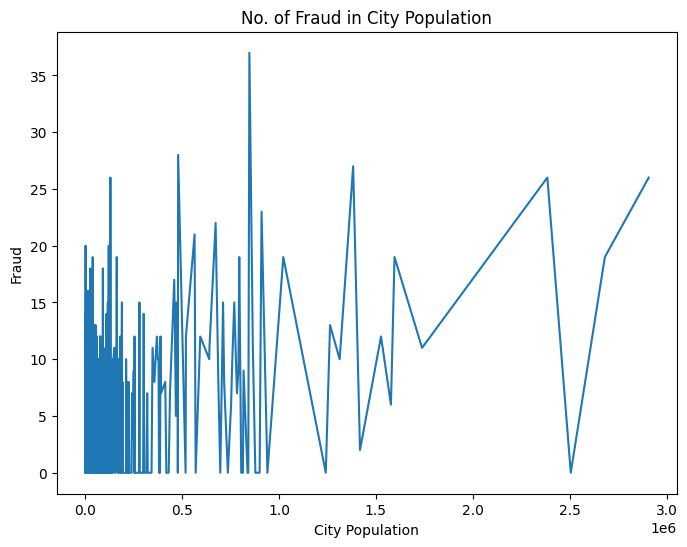

In [15]:
# check if higher population leads to higher fraud cases (since it may be easier to commit fraud) 
# fraud count per city_pop
fraud_count = df1.groupby('city_pop')['is_fraud'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.plot('city_pop','is_fraud', data=fraud_count) 
plt.title('No. of Fraud in City Population')
plt.xlabel('City Population')
plt.ylabel('Fraud')
plt.show()

## Some cities may be more popular for committing fraud
filter to a random state

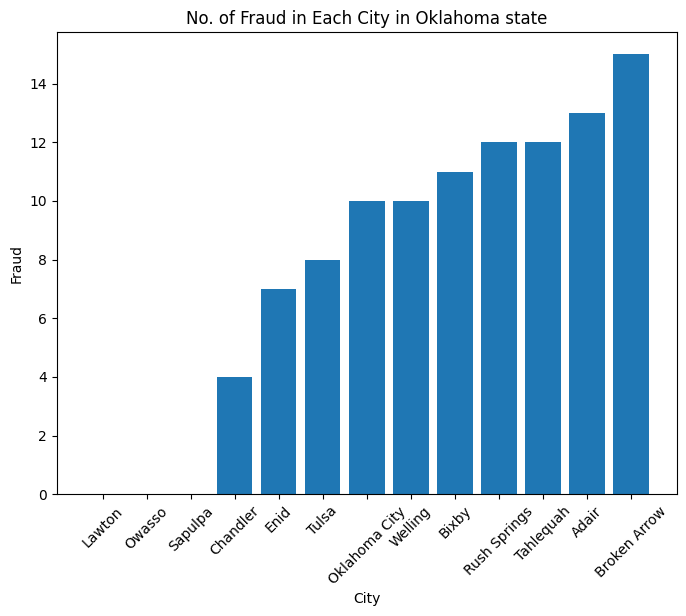

In [16]:
# x: city_state, y: fraud_count
# fraud count per city_pop, filter to a state to check
df_ok=df1[df1['state']=="OK"]
fraud_count = df_ok.groupby('city')['is_fraud'].sum().reset_index()
sorted_fraud=fraud_count.sort_values(by='is_fraud')

plt.figure(figsize=(8, 6))
plt.bar('city','is_fraud', data=sorted_fraud) 
plt.title('No. of Fraud in Each City in Oklahoma state')
plt.xlabel('City')
plt.ylabel('Fraud')
plt.xticks(rotation=45)
plt.show()

## Fraud involves larger sums
my output doesn't really reflect that tho

In [17]:
# x: fraud amt, y: fraud count
fraud_count = df1.groupby('amt')['is_fraud'].sum().reset_index()
fraud_count

labels = ['0-100', '100-500', '500-1000', '1000-5000', '>5000']
bins = [0, 100, 500, 1000, 5000, float('inf')]

# Create a new column with the range
fraud_count['amt_range'] = pd.cut(fraud_count['amt'], bins=bins, labels=labels, right=False) # note to myself: look into this concept
fraud_count.groupby('amt_range')['is_fraud'].sum()

# seems like amt= 500-1000 has the highest count of fraud

C:\Users\user\AppData\Local\Temp\ipykernel_1700\1589795349.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_count.groupby('amt_range')['is_fraud'].sum()


amt_range
0-100         678
100-500       969
500-1000     1232
1000-5000     459
>5000           0
Name: is_fraud, dtype: int64

## Some occupations have higher % of fraud than others
Geochemist involved in fraud??? doesn't make sense tho

                         job  is_fraud  total_count  fraud_percentage
0         Academic librarian         0          361          0.000000
1      Accommodation manager         0         1535          0.000000
2                 Accountant        68         7777          0.874373
3      Accounting technician        14         3658          0.382723
4                      Actor        46         4383          1.049509
..                       ...       ...          ...               ...
404           Water engineer         7         1463          0.478469
405  Water quality scientist         0          717          0.000000
406       Wellsite geologist         0         2154          0.000000
407                   Writer        16         1420          1.126761
408             Youth worker        11         6542          0.168144

[409 rows x 4 columns]


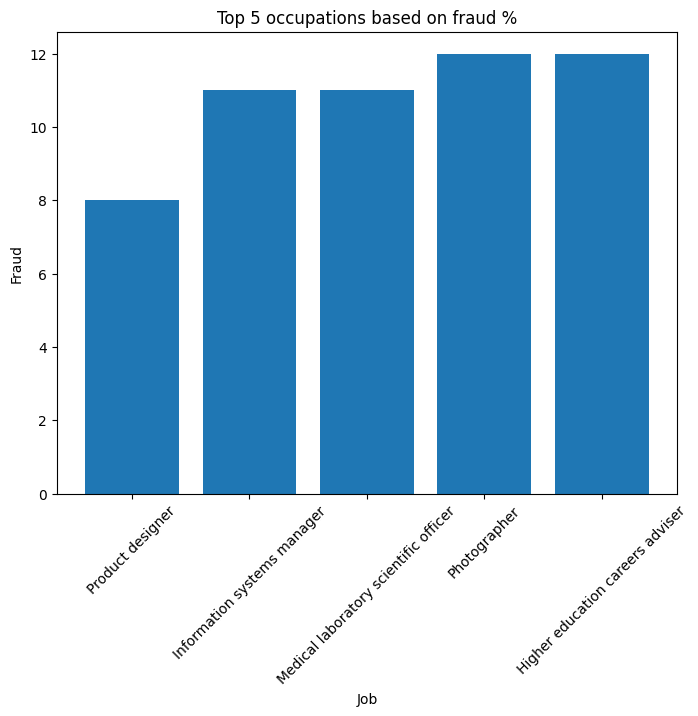

In [18]:
# x: city_state, y: fraud_count
# fraud count per city_pop, filter to a state to check
fraud_count = df1.groupby('job')['is_fraud'].sum().reset_index()

# Calculate total transactions by job
total_count = df1.groupby('job')['is_fraud'].count().reset_index()
total_count.rename(columns={'is_fraud': 'total_count'},inplace=True)


# Merge fraud count and total count
fraud_percentage = pd.merge(fraud_count, total_count, on='job')


# Calculate percentage of fraud
fraud_percentage['fraud_percentage'] = (fraud_percentage['is_fraud'] / fraud_percentage['total_count']) * 100
top_5=fraud_percentage.sort_values(by='fraud_percentage',ascending=False).head(5)
print(fraud_percentage)
# show occupations with the highest % of frauds

plt.figure(figsize=(8, 6))
plt.bar('job','is_fraud', data=top_5) 
plt.title('Top 5 occupations based on fraud %')
plt.xlabel('Job')
plt.ylabel('Fraud')
plt.xticks(rotation=45)
plt.show()